<h1>스마트카 이상 징후 판별<h1>
라이브러리 인포트

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc

학습용 데이타 로드

In [4]:
df = pd.read_csv('/content/sample_data/CarDrivingIncidentInfo.csv')

학습용 데이타 전처리

In [5]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

DNN 모델 구성 및 요약 정보 출력

In [6]:
model = Sequential([
    Dense(10, input_dim=10, activation='relu'),
    Dense(20, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 573
Trainable params: 573
Non-trainable params: 0
_________________________________________________________________


DNN 모델 학습

In [7]:
tensorboard = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=1, write_graph=True, write_images=True)

hist  = model.fit(X_train, Y_train, batch_size=2000, epochs=50, callbacks=[tensorboard], validation_data=(X_test, Y_test))

Epoch 1/50
80/80 [==============================] - 3s 7ms/step - loss: 0.9018 - accuracy: 0.5823 - val_loss: 0.7093 - val_accuracy: 0.6723
Epoch 2/50
80/80 [==============================] - 0s 4ms/step - loss: 0.5912 - accuracy: 0.7363 - val_loss: 0.4013 - val_accuracy: 0.8310
Epoch 3/50
80/80 [==============================] - 0s 5ms/step - loss: 0.3499 - accuracy: 0.8668 - val_loss: 0.2070 - val_accuracy: 0.9399
Epoch 4/50
80/80 [==============================] - 0s 4ms/step - loss: 0.2113 - accuracy: 0.9278 - val_loss: 0.1275 - val_accuracy: 0.9650
Epoch 5/50
80/80 [==============================] - 0s 4ms/step - loss: 0.1471 - accuracy: 0.9518 - val_loss: 0.0935 - val_accuracy: 0.9737
Epoch 6/50
80/80 [==============================] - 0s 4ms/step - loss: 0.1100 - accuracy: 0.9657 - val_loss: 0.0707 - val_accuracy: 0.9807
Epoch 7/50
80/80 [==============================] - 0s 4ms/step - loss: 0.0846 - accuracy: 0.9745 - val_loss: 0.0560 - val_accuracy: 0.9845
Epoch 8/50
80/80 [==

DNN 모델 학습한 결과

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.00011301845370326191, 1.0]


DNN 모델의 학습 결과 시각화

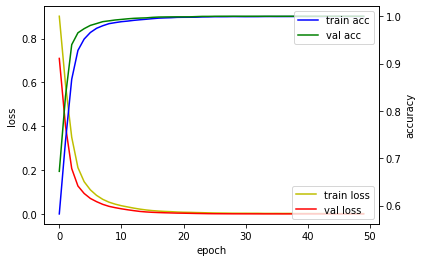

In [11]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')

loss_ax.set_ylabel('loss')
loss_ax.legend(loc='lower right')

acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

DNN 모델 예측 결과 평가

<Figure size 432x288 with 0 Axes>

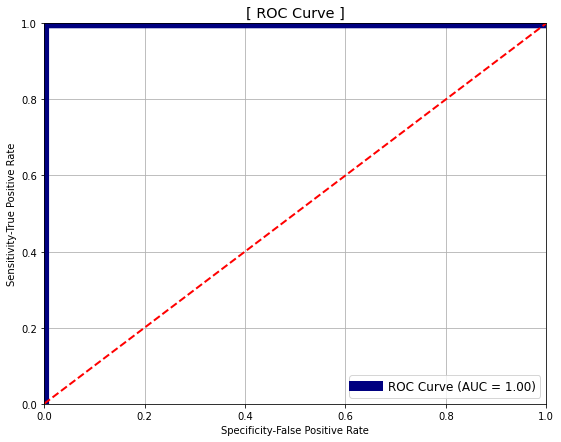

In [12]:
y_predict_result = model.predict(X_test)

fpr, tpr, thresholds = roc_curve (Y_test.ravel(), y_predict_result.ravel())
roc_auc = auc(fpr, tpr)

plt.clf()
plt.figure(figsize = (9, 7))
plt.plot(fpr, tpr, color='navy', lw=10, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('[ ROC Curve ]')
plt.xlabel('Specificity-False Positive Rate')
plt.ylabel('Sensitivity-True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

DNN 모델 저장

In [15]:
from keras.models import load_model

model.save('/content/sample_data/smartcar_dnn_model.h5')

End of Codes.